In [1]:
#from threeML import XYLike,DataList,Model,BayesianAnalysis,TemplateModel,PointSource,Truncated_gaussian,load_analysis_results
import sys
from threeML import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import time
%matplotlib inline
plt.rcParams.update({'font.size':14, 'figure.figsize':(12, 7)})

20:21:44 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=584507;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=386888;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=931619;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=247248;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=763158;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=633710;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/functions/functions_1D/absorption.py#36\36]8;;\
                  available                                                                                        

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=919172;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=597400;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=991983;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=773106;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=93368;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=858336;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=84847;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=116145;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=164994;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=896768;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=945883;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=373348;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/astromodels/core/parameter.py#704\704]8;;\

In [2]:
silence_logs()

In [2]:
threeML_config.parallel.use_parallel = True
threeML_config.parallel.profile_name = 'default'

# A0620 section

In [3]:
pa = '/home/yahecker/Obs_Data/A0620/'
data_path = pa + 'flux_%s_fit.txt'%'g_red'
gdata = XYLike.from_text_file("gdata", data_path)
gdata.assign_to_source(source_name = 'gband_source')

data_path = pa +'flux_%s_fit.txt'%'r_red'
rdata = XYLike.from_text_file("rdata", data_path)
rdata.assign_to_source(source_name = 'rband_source')

data_path = pa +'flux_%s_fit.txt'%'i_red'
idata = XYLike.from_text_file("idata", data_path)
idata.assign_to_source(source_name = 'iband_source')

data_path = pa +'flux_%s_fit.txt'%'z_red'
zdata = XYLike.from_text_file("zdata", data_path)
zdata.assign_to_source(source_name = 'zband_source')

data_path = pa +'flux_%s_fit.txt'%'J_red'
Jdata = XYLike.from_text_file("Jdata", data_path)
Jdata.assign_to_source(source_name = 'Jband_source')

data_path = pa +'flux_%s_fit.txt'%'H_red'
Hdata = XYLike.from_text_file("Hdata", data_path)
Hdata.assign_to_source(source_name = 'Hband_source')

data_path = pa +'flux_%s_fit.txt'%'K_red'
Kdata = XYLike.from_text_file("Kdata", data_path)
Kdata.assign_to_source(source_name = 'Kband_source')

data = DataList(gdata, rdata, idata, zdata, Jdata, Hdata, Kdata)

In [2]:
extinction_factors = {'g':1.282,
                      'r':0.897,
                      'i':0.641,
                      'z':0.513,
                      'J':0.385,
                      'H':0.256,
                      'K':0.128
                     }

In [5]:
def ModeltoPointSource(band):
    star = TemplateModel('A06_f_noHS_star_%s'%band, log_interp = False)
    star.K.fix = False
    star.scale.fix = True
    
    disc = TemplateModel('A06_f_noHS_disc_%s'%band, log_interp = False)
    disc.K.fix = False
    disc.scale.fix = True
    
    print(f'Loaded {band} model.')
    
    return PointSource('%s_source'%band, 0, 0, components=[SpectralComponent('Star', star), SpectralComponent('Disc', disc)])


filter_list = ['gband', 'rband', 'iband', 'zband', 'Jband', 'Hband', 'Kband']
point_source_list = ['ps_g', 'ps_r', 'ps_i', 'ps_z', 'ps_J', 'ps_H', 'ps_K']
PointSdict = {}
for h in range(len(filter_list)):
    PointSdict[point_source_list[h]] = ModeltoPointSource(filter_list[h])

my_model = Model(PointSdict['ps_g'], PointSdict['ps_r'],
                 PointSdict['ps_i'], PointSdict['ps_z'],
                 PointSdict['ps_J'], PointSdict['ps_H'], PointSdict['ps_K'])

Loaded gband model.
Loaded rband model.
Loaded iband model.
Loaded zband model.
Loaded Jband model.
Loaded Hband model.
Loaded Kband model.


In [3]:
parameter_Extinction = Parameter(name='A_V',
                                 value=0.5,
                                 min_value=0,
                                 max_value=5,
                                 # free=True,
                                 free=False,
                                 unit='',
                                 delta=0.05)

my_model.add_external_parameter(parameter_Extinction)

NameError: name 'my_model' is not defined

## To Do:
- Add independent variable (A_V)
- Multiply each band (i.e. source) output (!) by 10**(-0.4 * (k_band - k_g) * A_V)
- Fit

In [2]:
class FilterbandExtinctionFunction(Function1D, metaclass=FunctionMeta):
    r"""
    description :
        A function for calculating the extinction over a band with a pivot band
    latex : $ F_\lambda = K \cdot 10^{-0.4 \cdot k_{band} \cdot A_V} $
    parameters :
        K :
            desc : Normalization (differential flux without extinction)
            initial value : 1.0
            is_normalization : True
            fix : True
            min : 1e-30
            max : 1e3
            delta : 0.1
        k_band :
            desc : band dependent ratio of extinction in this band relative to Johnson V band ( $ A_\lambda/A_V $ )
            initial value : 1.0
            fix : yes
            min : -2
            max : 5
    """
    
    def _set_units(self, x_unit, y_unit):
        # The extinction constants are all dimensionless
        self.k_band.unit = u.dimensionless_unscaled

        # The normalization has the same units as the flux

        self.K.unit = y_unit


    def evaluate(self, x, K, k_band):

        return K * np.power(10, -0.4 * k_band * x)

Link the Normalization to the A_V with the corresponding factor formula

In [8]:
my_model.link(my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['g'] - extinction_factors['g']))
my_model.link(my_model.rband_source.spectrum.Star.A06_f_noHS_star_rband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['r'] - extinction_factors['g']))
my_model.link(my_model.iband_source.spectrum.Star.A06_f_noHS_star_iband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['i'] - extinction_factors['g']))
my_model.link(my_model.zband_source.spectrum.Star.A06_f_noHS_star_zband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['z'] - extinction_factors['g']))
my_model.link(my_model.Jband_source.spectrum.Star.A06_f_noHS_star_Jband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['J'] - extinction_factors['g']))
my_model.link(my_model.Hband_source.spectrum.Star.A06_f_noHS_star_Hband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['H'] - extinction_factors['g']))
my_model.link(my_model.Kband_source.spectrum.Star.A06_f_noHS_star_Kband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['K'] - extinction_factors['g']))

my_model.link(my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['g'] - extinction_factors['g']))
my_model.link(my_model.rband_source.spectrum.Disc.A06_f_noHS_disc_rband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['r'] - extinction_factors['g']))
my_model.link(my_model.iband_source.spectrum.Disc.A06_f_noHS_disc_iband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['i'] - extinction_factors['g']))
my_model.link(my_model.zband_source.spectrum.Disc.A06_f_noHS_disc_zband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['z'] - extinction_factors['g']))
my_model.link(my_model.Jband_source.spectrum.Disc.A06_f_noHS_disc_Jband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['J'] - extinction_factors['g']))
my_model.link(my_model.Hband_source.spectrum.Disc.A06_f_noHS_disc_Hband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['H'] - extinction_factors['g']))
my_model.link(my_model.Kband_source.spectrum.Disc.A06_f_noHS_disc_Kband.K, my_model.A_V, FilterbandExtinctionFunction(k_band=extinction_factors['K'] - extinction_factors['g']))

### g norm

In [9]:
allInklParams =[my_model.rband_source.spectrum.Star.A06_f_noHS_star_rband.Inkl,
                my_model.iband_source.spectrum.Star.A06_f_noHS_star_iband.Inkl,
                my_model.zband_source.spectrum.Star.A06_f_noHS_star_zband.Inkl,
                my_model.Jband_source.spectrum.Star.A06_f_noHS_star_Jband.Inkl,
                my_model.Hband_source.spectrum.Star.A06_f_noHS_star_Hband.Inkl,
                my_model.Kband_source.spectrum.Star.A06_f_noHS_star_Kband.Inkl,
                my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.Inkl,
                my_model.rband_source.spectrum.Disc.A06_f_noHS_disc_rband.Inkl,
                my_model.iband_source.spectrum.Disc.A06_f_noHS_disc_iband.Inkl,
                my_model.zband_source.spectrum.Disc.A06_f_noHS_disc_zband.Inkl,
                my_model.Jband_source.spectrum.Disc.A06_f_noHS_disc_Jband.Inkl,
                my_model.Hband_source.spectrum.Disc.A06_f_noHS_disc_Hband.Inkl,
                my_model.Kband_source.spectrum.Disc.A06_f_noHS_disc_Kband.Inkl]

allT_SecParams = [my_model.rband_source.spectrum.Star.A06_f_noHS_star_rband.T_Sec,
                  my_model.iband_source.spectrum.Star.A06_f_noHS_star_iband.T_Sec,
                  my_model.zband_source.spectrum.Star.A06_f_noHS_star_zband.T_Sec,
                  my_model.Jband_source.spectrum.Star.A06_f_noHS_star_Jband.T_Sec,
                  my_model.Hband_source.spectrum.Star.A06_f_noHS_star_Hband.T_Sec,
                  my_model.Kband_source.spectrum.Star.A06_f_noHS_star_Kband.T_Sec,
                  my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Sec,
                  my_model.rband_source.spectrum.Disc.A06_f_noHS_disc_rband.T_Sec,
                  my_model.iband_source.spectrum.Disc.A06_f_noHS_disc_iband.T_Sec,
                  my_model.zband_source.spectrum.Disc.A06_f_noHS_disc_zband.T_Sec,
                  my_model.Jband_source.spectrum.Disc.A06_f_noHS_disc_Jband.T_Sec,
                  my_model.Hband_source.spectrum.Disc.A06_f_noHS_disc_Hband.T_Sec,
                  my_model.Kband_source.spectrum.Disc.A06_f_noHS_disc_Kband.T_Sec]

allT_DiscParams = [my_model.rband_source.spectrum.Star.A06_f_noHS_star_rband.T_Disc,
                   my_model.iband_source.spectrum.Star.A06_f_noHS_star_iband.T_Disc,
                   my_model.zband_source.spectrum.Star.A06_f_noHS_star_zband.T_Disc,
                   my_model.Jband_source.spectrum.Star.A06_f_noHS_star_Jband.T_Disc,
                   my_model.Hband_source.spectrum.Star.A06_f_noHS_star_Hband.T_Disc,
                   my_model.Kband_source.spectrum.Star.A06_f_noHS_star_Kband.T_Disc,
                   my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Disc,
                   my_model.rband_source.spectrum.Disc.A06_f_noHS_disc_rband.T_Disc,
                   my_model.iband_source.spectrum.Disc.A06_f_noHS_disc_iband.T_Disc,
                   my_model.zband_source.spectrum.Disc.A06_f_noHS_disc_zband.T_Disc,
                   my_model.Jband_source.spectrum.Disc.A06_f_noHS_disc_Jband.T_Disc,
                   my_model.Hband_source.spectrum.Disc.A06_f_noHS_disc_Hband.T_Disc,
                   my_model.Kband_source.spectrum.Disc.A06_f_noHS_disc_Kband.T_Disc]

allf_rParams = [my_model.rband_source.spectrum.Star.A06_f_noHS_star_rband.f_r,
                my_model.iband_source.spectrum.Star.A06_f_noHS_star_iband.f_r,
                my_model.zband_source.spectrum.Star.A06_f_noHS_star_zband.f_r,
                my_model.Jband_source.spectrum.Star.A06_f_noHS_star_Jband.f_r,
                my_model.Hband_source.spectrum.Star.A06_f_noHS_star_Hband.f_r,
                my_model.Kband_source.spectrum.Star.A06_f_noHS_star_Kband.f_r,
                my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.f_r,
                my_model.rband_source.spectrum.Disc.A06_f_noHS_disc_rband.f_r,
                my_model.iband_source.spectrum.Disc.A06_f_noHS_disc_iband.f_r,
                my_model.zband_source.spectrum.Disc.A06_f_noHS_disc_zband.f_r,
                my_model.Jband_source.spectrum.Disc.A06_f_noHS_disc_Jband.f_r,
                my_model.Hband_source.spectrum.Disc.A06_f_noHS_disc_Hband.f_r,
                my_model.Kband_source.spectrum.Disc.A06_f_noHS_disc_Kband.f_r]

allRinnerParams = [my_model.rband_source.spectrum.Star.A06_f_noHS_star_rband.R_in,
                   my_model.iband_source.spectrum.Star.A06_f_noHS_star_iband.R_in,
                   my_model.zband_source.spectrum.Star.A06_f_noHS_star_zband.R_in,
                   my_model.Jband_source.spectrum.Star.A06_f_noHS_star_Jband.R_in,
                   my_model.Hband_source.spectrum.Star.A06_f_noHS_star_Hband.R_in,
                   my_model.Kband_source.spectrum.Star.A06_f_noHS_star_Kband.R_in,
                   my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.R_in,
                   my_model.rband_source.spectrum.Disc.A06_f_noHS_disc_rband.R_in,
                   my_model.iband_source.spectrum.Disc.A06_f_noHS_disc_iband.R_in,
                   my_model.zband_source.spectrum.Disc.A06_f_noHS_disc_zband.R_in,
                   my_model.Jband_source.spectrum.Disc.A06_f_noHS_disc_Jband.R_in,
                   my_model.Hband_source.spectrum.Disc.A06_f_noHS_disc_Hband.R_in,
                   my_model.Kband_source.spectrum.Disc.A06_f_noHS_disc_Kband.R_in]

# allAVParams = [my_model.Kband_source.spectrum.main.A06_f_noHS_star_Kband.A_V,
#                my_model.rband_source.spectrum.main.A06_f_noHS_star_rband.A_V,
#                my_model.iband_source.spectrum.main.A06_f_noHS_star_iband.A_V,
#                my_model.Jband_source.spectrum.main.A06_f_noHS_star_Jband.A_V,
#                my_model.Hband_source.spectrum.main.A06_f_noHS_star_Hband.A_V,
#                my_model.zband_source.spectrum.main.A06_f_noHS_star_zband.A_V]

my_model.link(allInklParams, my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl)
my_model.link(allT_SecParams, my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec)
my_model.link(allT_DiscParams, my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc)
my_model.link(allRinnerParams, my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in)
my_model.link(allf_rParams, my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r)
# my_model.link(allAVParams, my_model.gband_source.spectrum.main.A06_f_noHS_star_gband.A_V)

In [9]:
my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl.prior = Truncated_gaussian(mu = 58,
                                                                                     sigma = 15,
                                                                                     lower_bound = 46,
                                                                                     upper_bound=74)

my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec.prior = Truncated_gaussian(mu = 4500,
                                                                                      sigma=800,
                                                                                      lower_bound = 3750,
                                                                                      upper_bound = 5250)

my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc.prior = Truncated_gaussian(mu = 2750,
                                                                                      sigma=1000,
                                                                                      lower_bound = 1000,
                                                                                      upper_bound = 4500)

my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r.prior = Truncated_gaussian(mu = 0.3,
                                                                                      sigma = 0.6,
                                                                                      lower_bound = 0.0,
                                                                                      upper_bound = 1.0)

my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in.prior = Truncated_gaussian(mu = 6000,
                                                                                        sigma=4000,
                                                                                        lower_bound = 1000,
                                                                                        upper_bound = 10000)

In [10]:
my_model.display()

Model summary:
==============

                  N
Point sources     7
Extended sources  0
Particle sources  0

Free parameters (6):
--------------------

                        value min_value max_value unit
gband_source...Inkl      60.0      46.0      74.0     
gband_source...T_Sec   4500.0    3750.0    5250.0     
gband_source...T_Disc  3250.0    2000.0    4500.0     
gband_source...f_r        0.5       0.0       1.0     
gband_source...R_in    5500.0    1000.0   10000.0     
A_V                       0.5       0.0       5.0     

Fixed parameters (66):
(abridged. Use complete=True to see all fixed parameters)


Properties (0):
--------------------

(none)


Linked parameters (79):
----------------------

              gband_source.spectrum.Star.A06_f_noHS_star_gband.K
current value                                                1.0
function                            FilterbandExtinctionFunction
linked to                                                    A_V
unit                                             1 / (cm2 keV s)

              gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Disc
current value                                             3250.0     
function                                                    Line     
linked to      gband_source.spectrum.Disc.A06_f_noHS_disc_gba...     
unit                                                                 

              gband_source.spectrum.Star.A06_f_noHS_star_gband.f_r
current value                                                0.5  
function                                                    Line  
linked to      gband_source.spectrum.Disc.A06_f_noHS_disc_gba...  
unit                                                              

              gband_source.spectrum.Star.A06_f_noHS_star_gband.R_in
current value                                             5500.0   
function                                                    Line   
linked to      gband_source.spectrum.Disc.A06_f_noHS_disc_gba...   
unit                                                               

              gband_source.spectrum.Disc.A06_f_noHS_disc_gband.K
current value                                                1.0
function                            FilterbandExtinctionFunction
linked to                                                    A_V
unit                                             1 / (cm2 keV s)

              gband_source.spectrum.Disc.A06_f_noHS_disc_gband.Inkl
current value                                               60.0   
function                                                    Line   
linked to      gband_source.spectrum.Star.A06_f_noHS_star_gba...   
unit                                                               

              gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Sec
current value                                             4500.0    
function                                                    Line    
linked to      gband_source.spectrum.Star.A06_f_noHS_star_gba...    
unit                                                                

              rband_source.spectrum.Star.A06_f_noHS_star_rband.K
current value                                           1.193988
function                            FilterbandExtinctionFunction
linked to                                                    A_V
unit                                             1 / (cm2 keV s)

              rband_source.spectrum.Star.A06_f_noHS_star_rband.Inkl
current value                                               60.0   
function                                                    Line   
linked to      gband_source.spectrum.Star.A06_f_noHS_star_gba...   
unit                                                               

              rband_source.spectrum.Star.A06_f_noHS_star_rband.T_Sec
current value                                             4500.0    
function                                                    Line    
linked to      gband_source.spectrum.Sta

### noHS and simple parameterisation

allInklParams =[my_model.Xrb_Kband_source.spectrum.main.A06_AV_noHS_gnorm_Kband.Inkl,
                 my_model.Xrb_rband_source.spectrum.main.A06_AV_noHS_gnorm_rband.Inkl,
                 my_model.Xrb_iband_source.spectrum.main.A06_AV_noHS_gnorm_iband.Inkl,
                 my_model.Xrb_Jband_source.spectrum.main.A06_AV_noHS_gnorm_Jband.Inkl,
                 my_model.Xrb_Hband_source.spectrum.main.A06_AV_noHS_gnorm_Hband.Inkl,
                 my_model.Xrb_zband_source.spectrum.main.A06_AV_noHS_gnorm_zband.Inkl]
allT_DiscParams =[my_model.Xrb_Kband_source.spectrum.main.A06_AV_noHS_gnorm_Kband.T_Disc,
                 my_model.Xrb_rband_source.spectrum.main.A06_AV_noHS_gnorm_rband.T_Disc,
                 my_model.Xrb_iband_source.spectrum.main.A06_AV_noHS_gnorm_iband.T_Disc,
                 my_model.Xrb_Jband_source.spectrum.main.A06_AV_noHS_gnorm_Jband.T_Disc,
                 my_model.Xrb_Hband_source.spectrum.main.A06_AV_noHS_gnorm_Hband.T_Disc,
                 my_model.Xrb_zband_source.spectrum.main.A06_AV_noHS_gnorm_zband.T_Disc]
allT_SecParams = [my_model.Xrb_Kband_source.spectrum.main.A06_AV_noHS_gnorm_Kband.T_Sec,
                 my_model.Xrb_rband_source.spectrum.main.A06_AV_noHS_gnorm_rband.T_Sec,
                 my_model.Xrb_iband_source.spectrum.main.A06_AV_noHS_gnorm_iband.T_Sec,
                 my_model.Xrb_Jband_source.spectrum.main.A06_AV_noHS_gnorm_Jband.T_Sec,
                 my_model.Xrb_Hband_source.spectrum.main.A06_AV_noHS_gnorm_Hband.T_Sec,
                 my_model.Xrb_zband_source.spectrum.main.A06_AV_noHS_gnorm_zband.T_Sec]
allr_outParams = [my_model.Xrb_Kband_source.spectrum.main.A06_AV_noHS_gnorm_Kband.r_out,
                 my_model.Xrb_rband_source.spectrum.main.A06_AV_noHS_gnorm_rband.r_out,
                 my_model.Xrb_iband_source.spectrum.main.A06_AV_noHS_gnorm_iband.r_out,
                 my_model.Xrb_Jband_source.spectrum.main.A06_AV_noHS_gnorm_Jband.r_out,
                 my_model.Xrb_Hband_source.spectrum.main.A06_AV_noHS_gnorm_Hband.r_out,
                 my_model.Xrb_zband_source.spectrum.main.A06_AV_noHS_gnorm_zband.r_out]
allr_inParams = [my_model.Xrb_Kband_source.spectrum.main.A06_AV_noHS_gnorm_Kband.r_in,
                 my_model.Xrb_rband_source.spectrum.main.A06_AV_noHS_gnorm_rband.r_in,
                 my_model.Xrb_iband_source.spectrum.main.A06_AV_noHS_gnorm_iband.r_in,
                 my_model.Xrb_Jband_source.spectrum.main.A06_AV_noHS_gnorm_Jband.r_in,
                 my_model.Xrb_Hband_source.spectrum.main.A06_AV_noHS_gnorm_Hband.r_in,
                 my_model.Xrb_zband_source.spectrum.main.A06_AV_noHS_gnorm_zband.r_in]
allAVParams = [my_model.Xrb_Kband_source.spectrum.main.A06_AV_noHS_gnorm_Kband.A_V,
                 my_model.Xrb_rband_source.spectrum.main.A06_AV_noHS_gnorm_rband.A_V,
                 my_model.Xrb_iband_source.spectrum.main.A06_AV_noHS_gnorm_iband.A_V,
                 my_model.Xrb_Jband_source.spectrum.main.A06_AV_noHS_gnorm_Jband.A_V,
                 my_model.Xrb_Hband_source.spectrum.main.A06_AV_noHS_gnorm_Hband.A_V,
                 my_model.Xrb_zband_source.spectrum.main.A06_AV_noHS_gnorm_zband.A_V]

my_model.link(allInklParams, my_model.Xrb_gband_source.spectrum.main.A06_AV_noHS_gnorm_gband.Inkl)
my_model.link(allT_DiscParams, my_model.Xrb_gband_source.spectrum.main.A06_AV_noHS_gnorm_gband.T_Disc)
my_model.link(allT_SecParams, my_model.Xrb_gband_source.spectrum.main.A06_AV_noHS_gnorm_gband.T_Sec)
my_model.link(allr_inParams, my_model.Xrb_gband_source.spectrum.main.A06_AV_noHS_gnorm_gband.r_in)
my_model.link(allr_outParams, my_model.Xrb_gband_source.spectrum.main.A06_AV_noHS_gnorm_gband.r_out)
my_model.link(allAVParams, my_model.Xrb_gband_source.spectrum.main.A06_AV_noHS_gnorm_gband.A_V)

my_model.Xrb_gband_source.spectrum.main.A06_AV_noHS_gnorm_gband.Inkl.prior = Truncated_gaussian(mu = 58,
                                                                                     sigma = 15,
                                                                                     lower_bound = 50,
                                                                                     upper_bound=74)

my_model.Xrb_gband_source.spectrum.main.A06_AV_noHS_gnorm_gband.T_Sec.prior = Truncated_gaussian(mu = 4500,
                                                                                      sigma=800,
                                                                                      lower_bound = 3750,
                                                                                      upper_bound = 5000)

my_model.Xrb_gband_source.spectrum.main.A06_AV_noHS_gnorm_gband.T_Disc.prior = Truncated_gaussian(mu = 3500,
                                                                                      sigma=1000,
                                                                                      lower_bound = 2000,
                                                                                      upper_bound = 4500)

my_model.Xrb_gband_source.spectrum.main.A06_AV_noHS_gnorm_gband.r_out.prior = Truncated_gaussian(mu = 0.4,
                                                                                      sigma = 0.2,
                                                                                      lower_bound = 0.1,
                                                                                      upper_bound = 0.6)

my_model.Xrb_gband_source.spectrum.main.A06_AV_noHS_gnorm_gband.r_in.prior = Truncated_gaussian(mu = 0.05,
                                                                                        sigma=0.1,
                                                                                        lower_bound = 0.01,
                                                                                        upper_bound = 0.1)

my_model.Xrb_gband_source.spectrum.main.A06_AV_noHS_gnorm_gband.A_V.prior = Truncated_gaussian(mu = 1.0,
                                                                                        sigma=0.5,
                                                                                        lower_bound = 0.4,
                                                                                        upper_bound = 1.6)


In [13]:
for name, _ in my_model.free_parameters.items():
    print(name)

gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in
A_V


In [11]:
my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl.value = 68
my_model.gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec.value = 4000
my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc.value = 2500
my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r.value = 0.2
my_model.gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in.value = 8000
my_model.A_V = 0.4

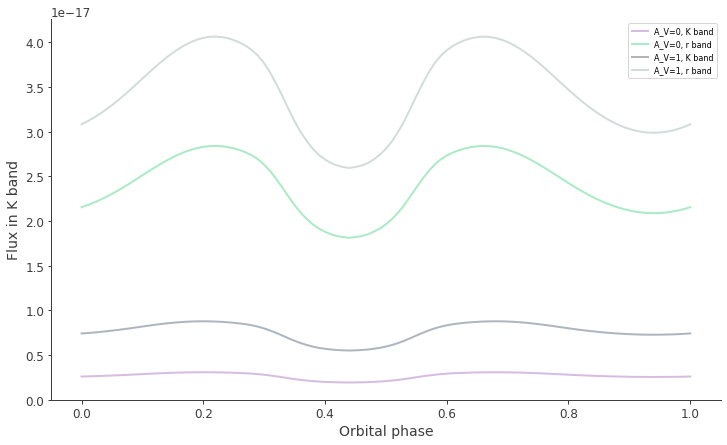

In [15]:
plt.figure(figsize=(12, 7))
av_test_values = [0, 1]
phases = np.linspace(0, 1, 101)

for i, av in enumerate(av_test_values):
    my_model.A_V = av
    plt.plot(phases, my_model.Kband_source.spectrum.Star.shape(phases), alpha=0.4,  label=f'A_V={av}, K band')
    plt.plot(phases, my_model.rband_source.spectrum.Star.shape(phases), alpha=0.4,  label=f'A_V={av}, r band')
plt.xlabel('Orbital phase')
plt.ylabel('Flux in K band')
plt.legend()

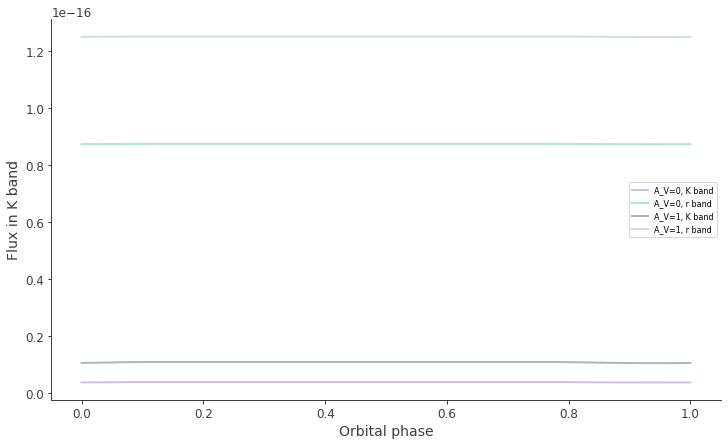

In [16]:
plt.figure(figsize=(12, 7))
av_test_values = [0, 1]
phases = np.linspace(0, 1, 101)

for i, av in enumerate(av_test_values):
    my_model.A_V = av
    plt.plot(phases, my_model.Kband_source.spectrum.Disc.shape(phases), alpha=0.4,  label=f'A_V={av}, K band')
    plt.plot(phases, my_model.rband_source.spectrum.Disc.shape(phases), alpha=0.4,  label=f'A_V={av}, r band')
plt.xlabel('Orbital phase')
plt.ylabel('Flux in K band')
plt.legend()

#### Create synthetic data

In [28]:
true_values = []
for name_ind, (par_name, par_val) in enumerate(my_model.free_parameters.items()):
    my_model.free_parameters[par_name].value = my_model.free_parameters[par_name].prior.from_unit_cube(np.random.rand())
    print(par_name, my_model.free_parameters[par_name].value)
    true_values.append(my_model.free_parameters[par_name].value)

gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl 65.3342950544228
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec 4757.965784337327
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc 3224.605634622797
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r 0.5938154973443481
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in 1845.0586754767983


In [23]:
gdata.set_model(my_model)
gsyn = gdata.get_simulated_dataset()
gsyn.assign_to_source(source_name = 'gband_source')

rdata.set_model(my_model)
rsyn = rdata.get_simulated_dataset()
rsyn.assign_to_source(source_name = 'rband_source')

idata.set_model(my_model)
isyn = idata.get_simulated_dataset()
isyn.assign_to_source(source_name = 'iband_source')

zdata.set_model(my_model)
zsyn = zdata.get_simulated_dataset()
zsyn.assign_to_source(source_name = 'zband_source')

Jdata.set_model(my_model)
Jsyn = Jdata.get_simulated_dataset()
Jsyn.assign_to_source(source_name = 'Jband_source')

Hdata.set_model(my_model)
Hsyn = Hdata.get_simulated_dataset()
Hsyn.assign_to_source(source_name = 'Hband_source')

Kdata.set_model(my_model)
Ksyn = Kdata.get_simulated_dataset()
Ksyn.assign_to_source(source_name = 'Kband_source')

In [24]:
syn_data = DataList(gsyn, rsyn, isyn, zsyn, Jsyn, Hsyn, Ksyn)

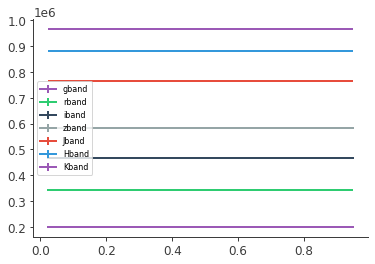

In [25]:
for i, dataset in enumerate(syn_data.values()):
    plt.errorbar(dataset.x, dataset.y, dataset.yerr, None, label=filter_list[i])
plt.legend()

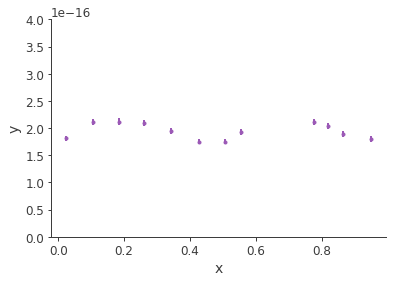

In [11]:
gdata.plot()
plt.ylim([0, 4e-16])
plt.show()

In [11]:
activate_logs()

In [12]:
show_configuration('parallel')

parallel
 ╠═ profile_name
 ║  ╚═ default
 ╚═ use_parallel
    ╚═ False


In [13]:
f'{int(10*0.3):02d}'

'03'

In [12]:
%%time

this_AV = 0.9

my_model.A_V = this_AV

with use_astromodels_memoization(False):
    
    bs = BayesianAnalysis(my_model, data)
    
    bs.set_sampler('emcee')
    bs.sampler.setup(n_iterations=500, n_burn_in=6000, n_walkers=400)

    bs.sample()
    
    bs.results.write_to(f'Fitting_Results/A06_f_noHS_3comp_{int(this_AV*10):02d}.fits', overwrite=True)

12:49:11 INFO      sampler set to emcee                                                    ]8;id=177162;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=66737;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/threeML/bayesian/bayesian_analysis.py#233\233]8;;\

  0%|          | 0/6000 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

16:05:01 INFO      Mean acceptance fraction: 0.13093                                           ]8;id=180087;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=441163;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/threeML/bayesian/emcee_sampler.py#157\157]8;;\

Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
gband_source...Inkl,(6.79 -0.31 +0.29) x 10,
gband_source...T_Sec,(4.143 -0.035 +0.04) x 10^3,
gband_source...T_Disc,(3.0 -0.4 +0.6) x 10^3,
gband_source...f_r,(2.5 -0.9 +0.4) x 10^-1,
gband_source...R_in,(6.3 -1.7 +1.8) x 10^3,



Values of -log(posterior) at the minimum:



,-log(posterior)
Hdata,-28.943111
Jdata,-32.783470
Kdata,-32.906021
gdata,-38.857876
idata,-52.434723
rdata,-32.234545
total,-263.497351
zdata,-45.337606



Values of statistical measures:



,statistical measures
AIC,537.784177
BIC,549.028299
DIC,-3364.065196
PDIC,-3570.336417


CPU times: user 3h 16min 44s, sys: 1min 43s, total: 3h 18min 27s
Wall time: 3h 16min 38s


In [3]:
ba = load_analysis_results('Fitting_Results/A06_f_noHS_3comp.fits')

In [11]:
ba.get_data_frame('hpd')

,value,negative_error,positive_error,error,unit
gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl,67.457608,-3.636874,3.847943,3.742408,
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec,3943.448013,-26.879727,39.474899,33.177313,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc,1947.631802,-611.468858,527.130582,569.299720,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r,0.247765,-0.092968,0.089086,0.091027,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in,5729.227578,-2722.036438,1282.886569,2002.461503,
A_V,0.311615,-0.086616,0.102577,0.094597,


20:21:02 INFO      Stepsize for sliding window is 441                                      ]8;id=438148;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/threeML/analysis_results.py\analysis_results.py]8;;\:]8;id=482457;file:///home/yahecker/.virtualenvs/3ML/lib/python3.8/site-packages/threeML/analysis_results.py#1485\1485]8;;\

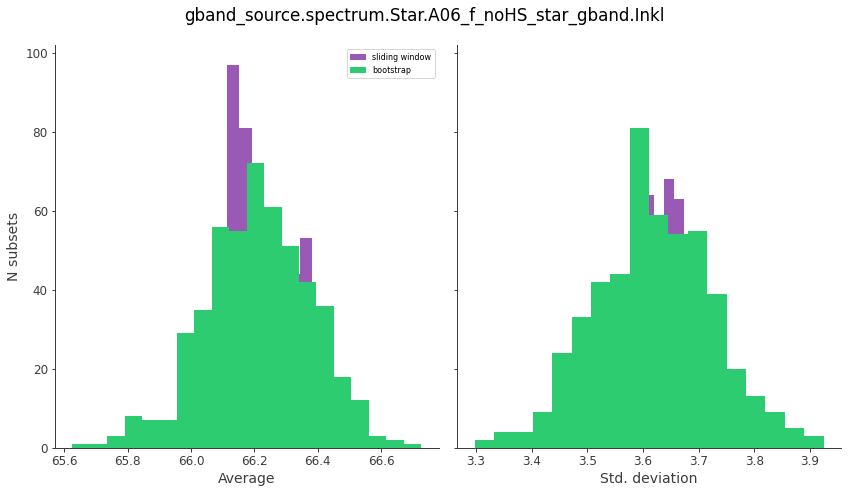

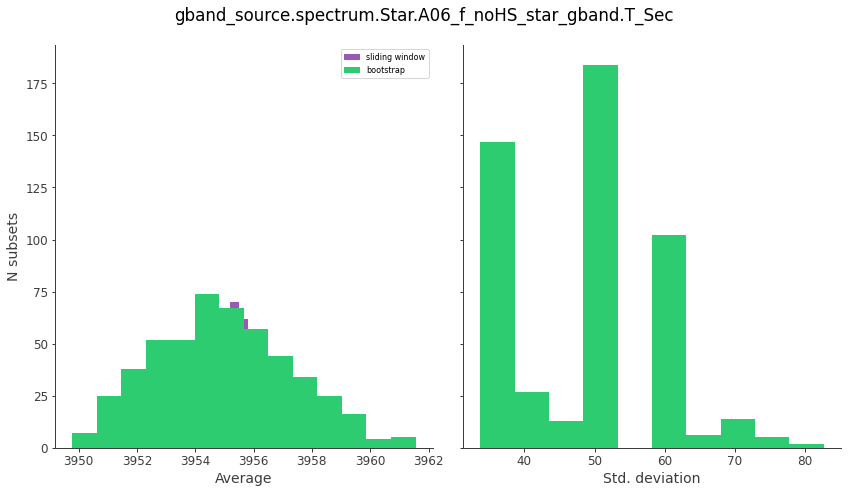

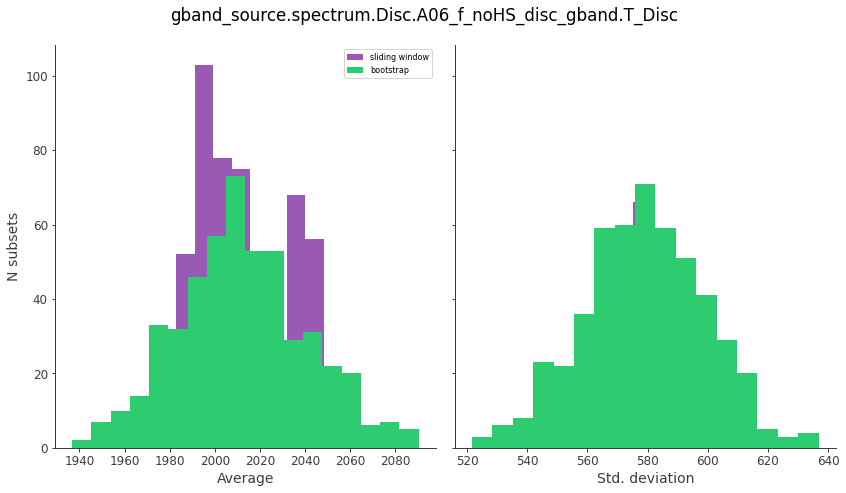

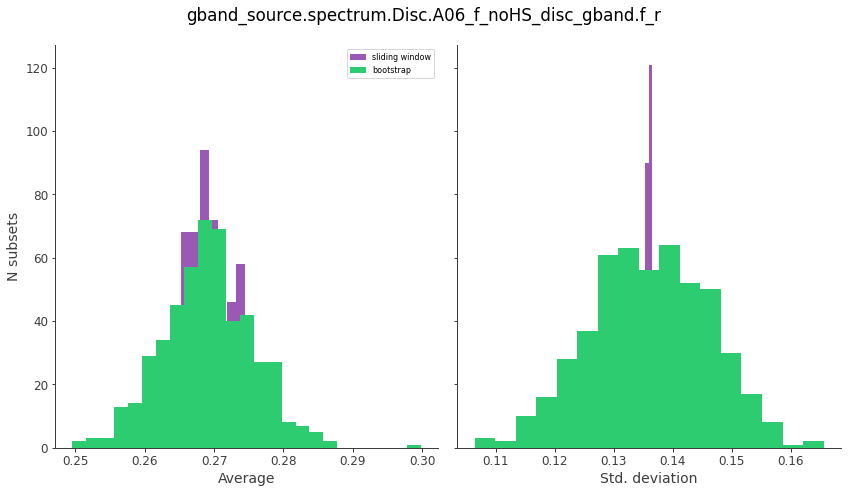

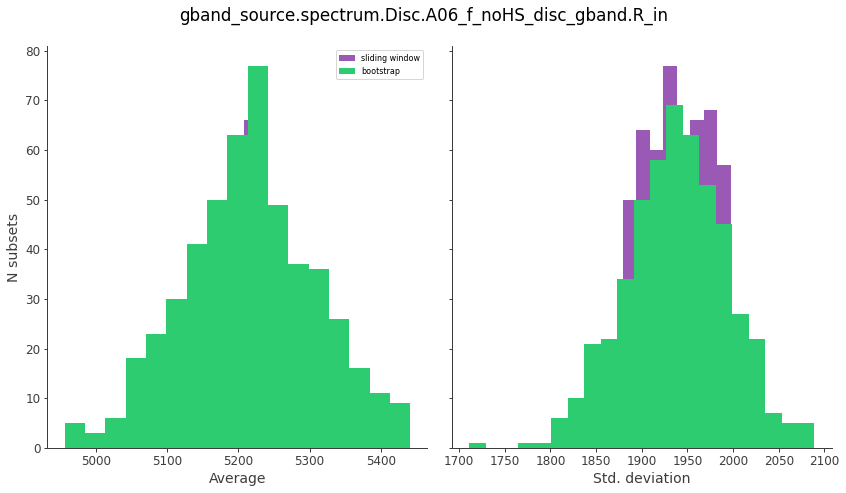

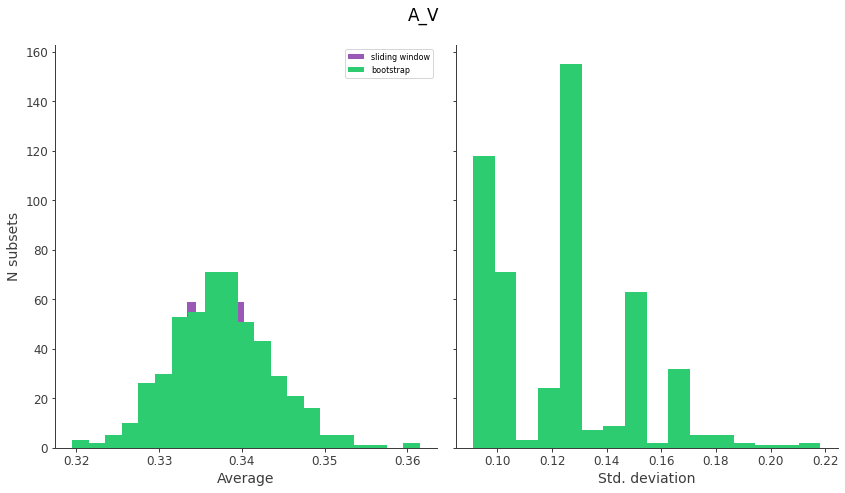

In [12]:
ba.convergence_plots(441, 500)
plt.show()

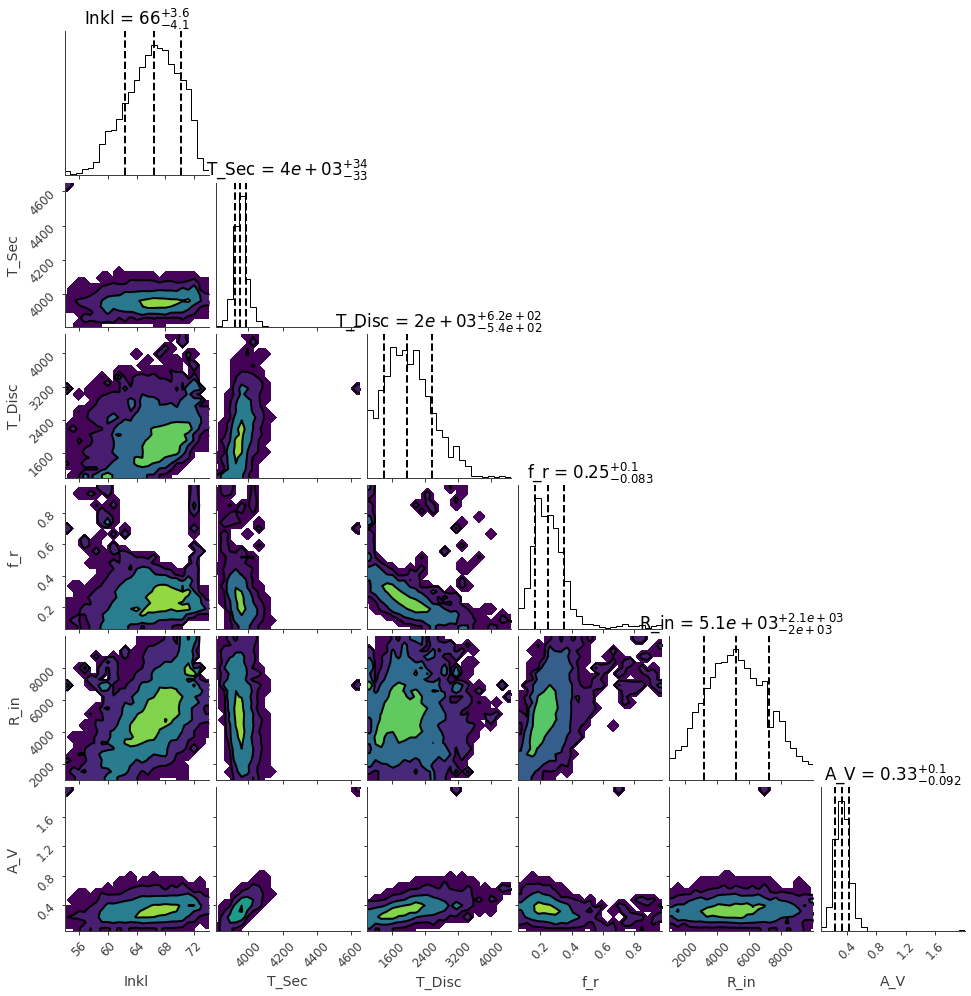

In [13]:
ba.corner_plot()
plt.show()


WARNING MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()



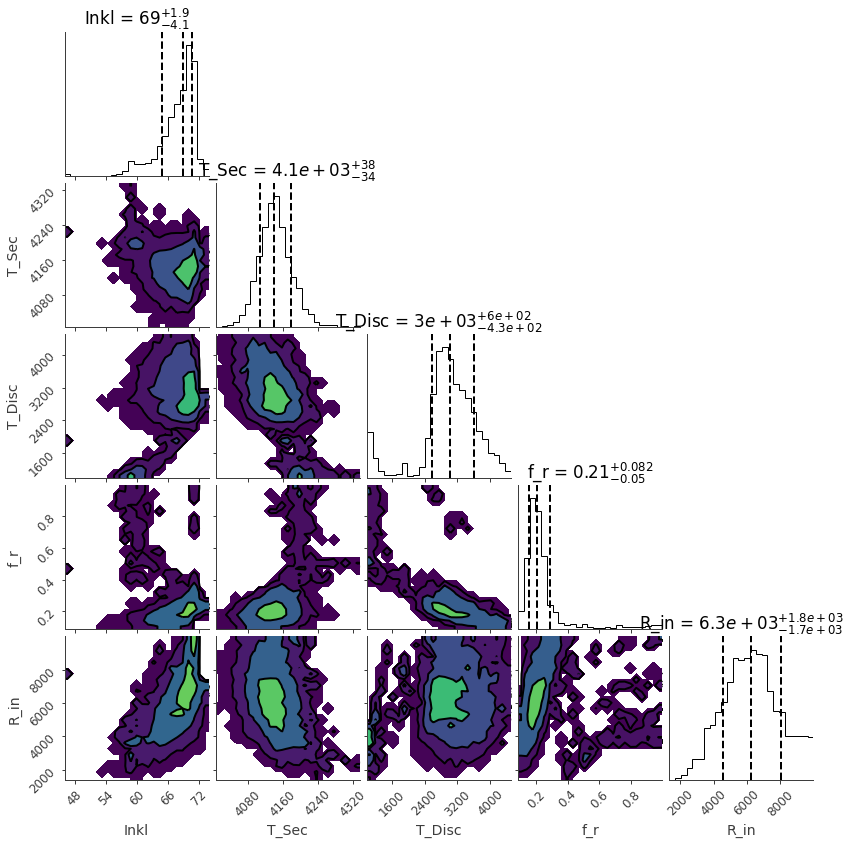

In [13]:
bs.results.corner_plot()
plt.savefig(f'plots/A06_AV_f_noHS_3comp_cp_{int(this_AV*10):02d}.pdf', format='pdf')
plt.show()

In [14]:
### A_V = 0.9
bs.results.get_data_frame()

,value,negative_error,positive_error,error,unit
gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl,67.918835,-3.072954,2.853478,2.963216,
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec,4143.115873,-35.484906,35.657109,35.571007,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc,2990.642113,-407.041435,618.688596,512.865016,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r,0.249041,-0.093245,0.038309,0.065777,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in,6289.923113,-1744.425499,1777.961341,1761.193420,


In [13]:
### A_V = 0.7
bs.results.get_data_frame()

,value,negative_error,positive_error,error,unit
gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl,67.722961,-3.431860,3.136288,3.284074,
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec,4075.251599,-29.176969,28.244771,28.710870,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc,2821.428524,-447.671096,555.521634,501.596365,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r,0.226377,-0.081743,0.041778,0.061761,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in,5834.648730,-1749.411117,1904.170654,1826.790886,


In [16]:
### A_V = 0.5
bs.results.get_data_frame()

,value,negative_error,positive_error,error,unit
gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl,67.045328,-4.037736,3.754766,3.896251,
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec,4002.734855,-31.903812,31.388188,31.646000,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc,2463.369556,-476.252114,573.795648,525.023881,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r,0.244376,-0.103075,0.059594,0.081334,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in,5477.251665,-1911.518122,1932.930580,1922.224351,


In [17]:
### A_V = 0.3
bs.results.get_data_frame()

,value,negative_error,positive_error,error,unit
gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl,65.825060,-3.387231,3.506761,3.446996,
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec,3944.727088,-21.127000,20.640075,20.883537,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc,1862.004139,-407.138041,397.120700,402.129370,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r,0.254060,-0.081829,0.081840,0.081835,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in,4943.396455,-1982.123845,2038.225450,2010.174648,


In [11]:
ba = load_analysis_results('Fitting_Results/A06_f_noHS_3comp.fits')

In [12]:
ba.get_data_frame()

,value,negative_error,positive_error,error,unit
gband_source.spectrum.Star.A06_f_noHS_star_gband.Inkl,67.457608,-5.055339,2.663291,3.859315,
gband_source.spectrum.Star.A06_f_noHS_star_gband.T_Sec,3943.448013,-23.709911,43.200734,33.455322,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.T_Disc,1947.631802,-524.497372,633.113367,578.805370,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.f_r,0.247765,-0.083754,0.103818,0.093786,
gband_source.spectrum.Disc.A06_f_noHS_disc_gband.R_in,5729.227578,-2550.540929,1527.748153,2039.144541,
A_V,0.311615,-0.073850,0.117611,0.095731,


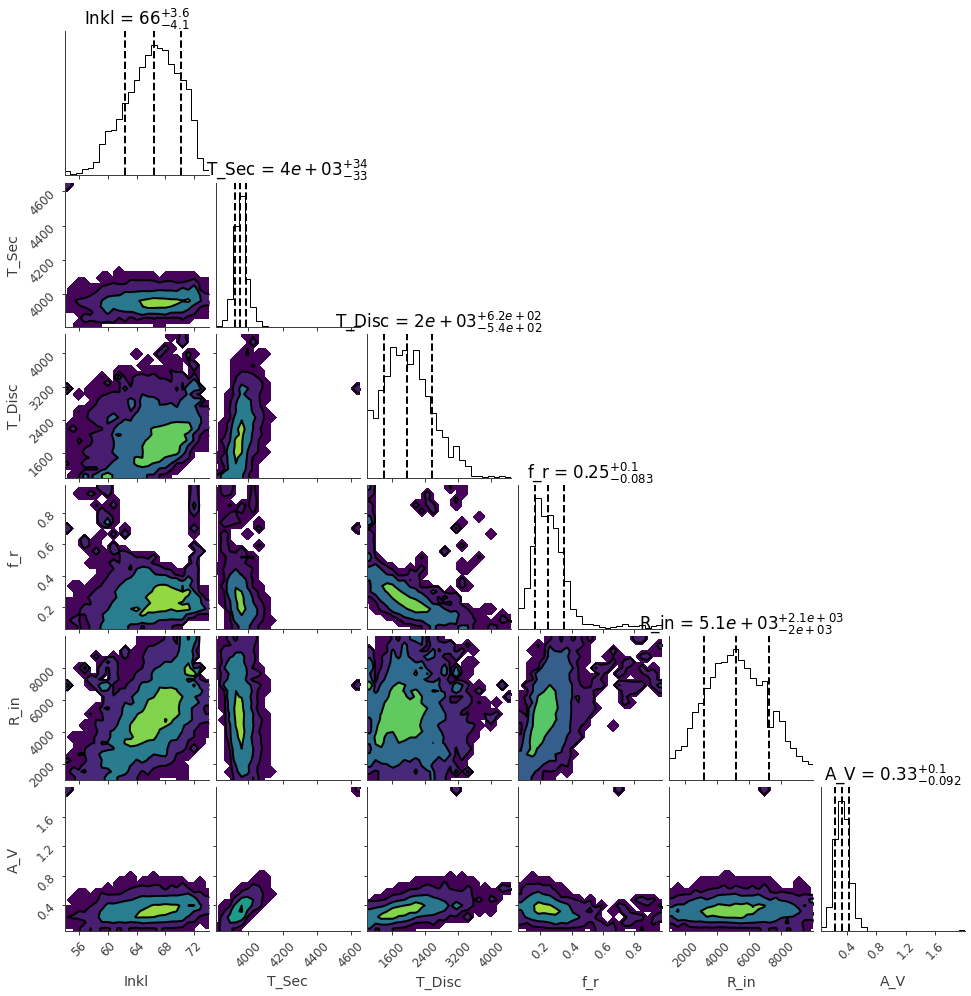

In [12]:
ba.corner_plot()
plt.savefig('plots/A06_AV_f_noHS_3comp_cp.pdf', format='pdf')
plt.show()

In [13]:
print(bs.results.get_data_frame().swapaxes(0, 1).to_latex())

\begin{tabular}{lllllll}
\toprule
{} & gband\_source.spectrum.Star.A06\_f\_noHS\_star\_gband.Inkl & gband\_source.spectrum.Star.A06\_f\_noHS\_star\_gband.T\_Sec & gband\_source.spectrum.Disc.A06\_f\_noHS\_disc\_gband.T\_Disc & gband\_source.spectrum.Disc.A06\_f\_noHS\_disc\_gband.f\_r & gband\_source.spectrum.Disc.A06\_f\_noHS\_disc\_gband.R\_in &       A\_V \\
\midrule
value          &                                          66.187964 &                                        3954.659011 &                                         2022.12319 &                                           0.281488 &                                        5280.443869 &  0.332153 \\
negative\_error &                                          -4.212259 &                                         -35.907429 &                                        -646.354105 &                                          -0.118688 &                                       -2063.326585 & -0.099189 \\
positive\_error &                   

In [15]:
print(bs.results.get_data_frame().to_latex())

\begin{tabular}{lrrrrl}
\toprule
{} &        value &  negative\_error &  positive\_error &        error & unit \\
\midrule
gband\_source.spectrum.Star.A06\_f\_noHS\_star\_gban... &    66.342719 &       -4.005894 &        4.272968 &     4.139431 &      \\
gband\_source.spectrum.Star.A06\_f\_noHS\_star\_gban... &  3953.036294 &      -36.279717 &       32.676925 &    34.478321 &      \\
gband\_source.spectrum.Disc.A06\_f\_noHS\_disc\_gban... &  2001.028329 &     -659.642495 &      662.631485 &   661.136990 &      \\
gband\_source.spectrum.Disc.A06\_f\_noHS\_disc\_gban... &     0.287451 &       -0.122789 &        0.090341 &     0.106565 &      \\
gband\_source.spectrum.Disc.A06\_f\_noHS\_disc\_gban... &  5393.614702 &    -2191.074262 &     2253.861820 &  2222.468041 &      \\
A\_V                                                &     0.327314 &       -0.098906 &        0.092794 &     0.095850 &      \\
\bottomrule
\end{tabular}



In [38]:
def PPC_per_band_V2(model, samples, band=None, phases=None, index_array=None):
    '''Compute posterior predictive checks for a given
    <model>, posterior samples <samples> and orbital phases
    to be covered.'''
    
    assert band is not None, "Please provide a band for the PPC!"
    
    assert phases is not None, "No orbital phases provided!"
    
    if index_array is None:
        print('No random array of indizes provided. Using 100 randomly generated numbers instead.')
        index_array = np.random.default_rng().integers(0, np.max(np.shape(samples)), 100)
    
    container = np.zeros((np.size(index_array), np.size(phases)))
    
    for j, index in enumerate(index_array):
        ### assign the model the values
        for name_ind, par_name in enumerate(list(model.free_parameters.keys())):
            # model.free_parameters[par_name].value = samples[par_name][index]
            model.free_parameters[par_name].value = samples[name_ind, index]
        
        ### get the lightcurve for the specific band
        container[j] = model.point_sources[f'{band}_source'].spectrum.Star.shape(phases) + model.point_sources[f'{band}_source'].spectrum.Disc.shape(phases)
    
    return container

In [39]:
samples = bs.results.samples

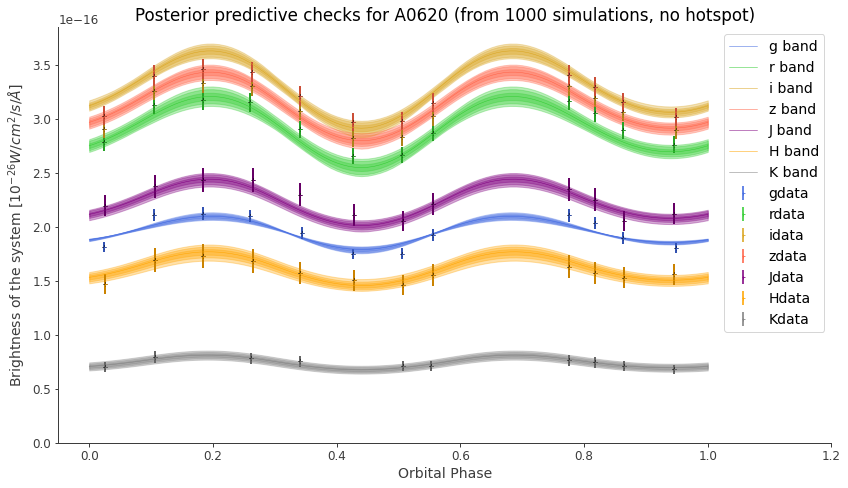

In [46]:
lColor=['royalblue','limegreen','goldenrod','tomato','purple','orange','grey']
plt.figure(figsize=(12, 7))

phases = np.linspace(0, 1, 101)

ppc_points = 1000

index_array = np.random.randint(0, np.shape(samples)[1], ppc_points)

### construct the PPCs
# g_ppc = PPC_per_band_V2(my_model, samples, 'gband', phases, index_array)
# r_ppc = PPC_per_band_V2(my_model, samples, 'rband', phases, index_array)
# i_ppc = PPC_per_band_V2(my_model, samples, 'iband', phases, index_array)
# z_ppc = PPC_per_band_V2(my_model, samples, 'zband', phases, index_array)
# J_ppc = PPC_per_band_V2(my_model, samples, 'Jband', phases, index_array)
# H_ppc = PPC_per_band_V2(my_model, samples, 'Hband', phases, index_array)
# K_ppc = PPC_per_band_V2(my_model, samples, 'Kband', phases, index_array)

alpha = min([5/ppc_points, 1])

lower_1, upper_1 = 0.5 - 0.683/2, 0.5 + 0.683/2
lower_2, upper_2 = 0.5 - 0.955/2, 0.5 + 0.955/2
lower_3, upper_3 = 0.5 - 0.997/2, 0.5 + 0.997/2

axis = 0

### 1-sigma regions
plt.fill_between(phases, np.quantile(g_ppc, lower_1, axis=axis), np.quantile(g_ppc, upper_1, axis=axis) , color=lColor[0], alpha=0.33)
plt.fill_between(phases, np.quantile(r_ppc, lower_1, axis=axis), np.quantile(r_ppc, upper_1, axis=axis) , color=lColor[1], alpha=0.33)
plt.fill_between(phases, np.quantile(i_ppc, lower_1, axis=axis), np.quantile(i_ppc, upper_1, axis=axis) , color=lColor[2], alpha=0.33)
plt.fill_between(phases, np.quantile(z_ppc, lower_1, axis=axis), np.quantile(z_ppc, upper_1, axis=axis) , color=lColor[3], alpha=0.33)
plt.fill_between(phases, np.quantile(J_ppc, lower_1, axis=axis), np.quantile(J_ppc, upper_1, axis=axis) , color=lColor[4], alpha=0.33)
plt.fill_between(phases, np.quantile(H_ppc, lower_1, axis=axis), np.quantile(H_ppc, upper_1, axis=axis) , color=lColor[5], alpha=0.33)
plt.fill_between(phases, np.quantile(K_ppc, lower_1, axis=axis), np.quantile(K_ppc, upper_1, axis=axis) , color=lColor[6], alpha=0.33)

### 2-sigma regions
plt.fill_between(phases, np.quantile(g_ppc, lower_2, axis=axis), np.quantile(g_ppc, upper_2, axis=axis) , color=lColor[0], alpha=0.33)
plt.fill_between(phases, np.quantile(r_ppc, lower_2, axis=axis), np.quantile(r_ppc, upper_2, axis=axis) , color=lColor[1], alpha=0.33)
plt.fill_between(phases, np.quantile(i_ppc, lower_2, axis=axis), np.quantile(i_ppc, upper_2, axis=axis) , color=lColor[2], alpha=0.33)
plt.fill_between(phases, np.quantile(z_ppc, lower_2, axis=axis), np.quantile(z_ppc, upper_2, axis=axis) , color=lColor[3], alpha=0.33)
plt.fill_between(phases, np.quantile(J_ppc, lower_2, axis=axis), np.quantile(J_ppc, upper_2, axis=axis) , color=lColor[4], alpha=0.33)
plt.fill_between(phases, np.quantile(H_ppc, lower_2, axis=axis), np.quantile(H_ppc, upper_2, axis=axis) , color=lColor[5], alpha=0.33)
plt.fill_between(phases, np.quantile(K_ppc, lower_2, axis=axis), np.quantile(K_ppc, upper_2, axis=axis) , color=lColor[6], alpha=0.33)

### 3-sigma regions
plt.fill_between(phases, np.quantile(g_ppc, lower_3, axis=axis), np.quantile(g_ppc, upper_3, axis=axis) , color=lColor[0], alpha=0.33)
plt.fill_between(phases, np.quantile(r_ppc, lower_3, axis=axis), np.quantile(r_ppc, upper_3, axis=axis) , color=lColor[1], alpha=0.33)
plt.fill_between(phases, np.quantile(i_ppc, lower_3, axis=axis), np.quantile(i_ppc, upper_3, axis=axis) , color=lColor[2], alpha=0.33)
plt.fill_between(phases, np.quantile(z_ppc, lower_3, axis=axis), np.quantile(z_ppc, upper_3, axis=axis) , color=lColor[3], alpha=0.33)
plt.fill_between(phases, np.quantile(J_ppc, lower_3, axis=axis), np.quantile(J_ppc, upper_3, axis=axis) , color=lColor[4], alpha=0.33)
plt.fill_between(phases, np.quantile(H_ppc, lower_3, axis=axis), np.quantile(H_ppc, upper_3, axis=axis) , color=lColor[5], alpha=0.33)
plt.fill_between(phases, np.quantile(K_ppc, lower_3, axis=axis), np.quantile(K_ppc, upper_3, axis=axis) , color=lColor[6], alpha=0.33)


# bs.restore_median_fit()

### plot the best fit model for reference
# LC_g = my_model.gband_source.spectrum.Star.shape(phases) + my_model.gband_source.spectrum.Disc.shape(phases)
# LC_r = my_model.rband_source.spectrum.Star.shape(phases) + my_model.rband_source.spectrum.Disc.shape(phases)
# LC_i = my_model.iband_source.spectrum.Star.shape(phases) + my_model.iband_source.spectrum.Disc.shape(phases)
# LC_z = my_model.zband_source.spectrum.Star.shape(phases) + my_model.zband_source.spectrum.Disc.shape(phases)
# LC_J = my_model.Jband_source.spectrum.Star.shape(phases) + my_model.Jband_source.spectrum.Disc.shape(phases)
# LC_H = my_model.Hband_source.spectrum.Star.shape(phases) + my_model.Hband_source.spectrum.Disc.shape(phases)
# LC_K = my_model.Kband_source.spectrum.Star.shape(phases) + my_model.Kband_source.spectrum.Disc.shape(phases)

for i, dataset in enumerate(data.values()):
    plt.errorbar(dataset.x, dataset.y, dataset.yerr, None, '+', ms=4, color='k')
    plt.errorbar(dataset.x, dataset.y, dataset.yerr, None, '+', ms=3, color=lColor[i], label=list(data.keys())[i], alpha=0.8)
plt.plot(phases, np.median(g_ppc, axis=axis), color=lColor[0], label='g band', linewidth=0.5) #, alpha=0.7)
plt.plot(phases, np.median(r_ppc, axis=axis), color=lColor[1], label='r band', linewidth=0.5) #, alpha=0.7)
plt.plot(phases, np.median(i_ppc, axis=axis), color=lColor[2], label='i band', linewidth=0.5) #, alpha=0.7)
plt.plot(phases, np.median(z_ppc, axis=axis), color=lColor[3], label='z band', linewidth=0.5) #, alpha=0.7)
plt.plot(phases, np.median(J_ppc, axis=axis), color=lColor[4], label='J band', linewidth=0.5) #, alpha=0.7)
plt.plot(phases, np.median(H_ppc, axis=axis), color=lColor[5], label='H band', linewidth=0.5) #, alpha=0.7)
plt.plot(phases, np.median(K_ppc, axis=axis), color=lColor[6], label='K band', linewidth=0.5) #, alpha=0.7)

plt.xlabel('Orbital Phase')
plt.ylabel(r'Brightness of the system [$\mathrm{erg/cm^2/s/\AA}$]')
xmin, xmax = plt.xlim()
_, ymax = plt.ylim()
plt.xlim([xmin, xmax+0.15])
plt.ylim([0, ymax])
plt.legend(fontsize=14)

plt.title(f'Posterior predictive checks for A0620 (from {ppc_points} simulations, no hotspot)')

plt.tight_layout()

plt.savefig('plots/A06_f_noHS_3comp_PPC.pdf', format='pdf')

plt.show()

In [41]:
Lambda_mean = np.array([4586, 6220, 7641, 8989, 12398, 16468, 21706], dtype=np.float64)
dLambda = np.array([746, 847, 501, 637, 1183, 1351, 1516], dtype=np.float64)

In [42]:
SED_data = np.array([subdata.y[np.argmin(subdata.x)] for subdata in data.values()])
dSED_data = np.array([subdata.yerr[np.argmin(subdata.x)] for subdata in data.values()])

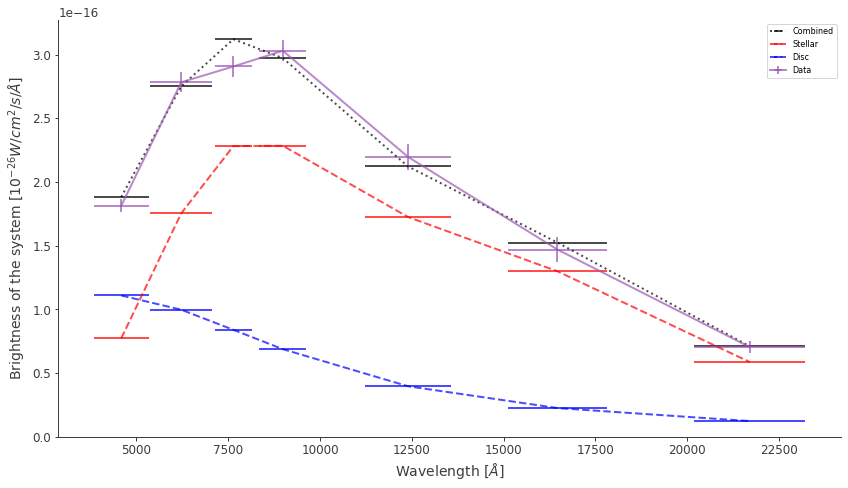

In [43]:
plt.figure(figsize=(12, 7))
SED = np.array([LC_g[0], LC_r[0], LC_i[0], LC_z[0], LC_J[0], LC_H[0], LC_K[0]])
SED_star = np.array([my_model.gband_source.spectrum.Star.shape(0),
                     my_model.rband_source.spectrum.Star.shape(0),
                     my_model.iband_source.spectrum.Star.shape(0),
                     my_model.zband_source.spectrum.Star.shape(0),
                     my_model.Jband_source.spectrum.Star.shape(0),
                     my_model.Hband_source.spectrum.Star.shape(0),
                     my_model.Kband_source.spectrum.Star.shape(0)]
                   )
SED_disc = np.array([my_model.gband_source.spectrum.Disc.shape(0),
                     my_model.rband_source.spectrum.Disc.shape(0),
                     my_model.iband_source.spectrum.Disc.shape(0),
                     my_model.zband_source.spectrum.Disc.shape(0),
                     my_model.Jband_source.spectrum.Disc.shape(0),
                     my_model.Hband_source.spectrum.Disc.shape(0),
                     my_model.Kband_source.spectrum.Disc.shape(0)]
                   )

plt.errorbar(Lambda_mean, SED, None, dLambda, 'k:', label='Combined', alpha=0.7)
plt.errorbar(Lambda_mean, SED_star, None, dLambda, 'r--', label='Stellar', alpha=0.7)
plt.errorbar(Lambda_mean, SED_disc, None, dLambda, 'b--', label='Disc', alpha=0.7)

plt.errorbar(Lambda_mean, SED_data, dSED_data, dLambda, '-', label='Data', alpha=0.7)

_, ymax = plt.ylim()
plt.ylim([0, ymax])
plt.ylabel(r'Brightness of the system [$\mathrm{erg/cm^2/s/\AA}$]')
plt.xlabel(r'Wavelength [$\AA$]')

plt.tight_layout()

plt.legend()

plt.show()

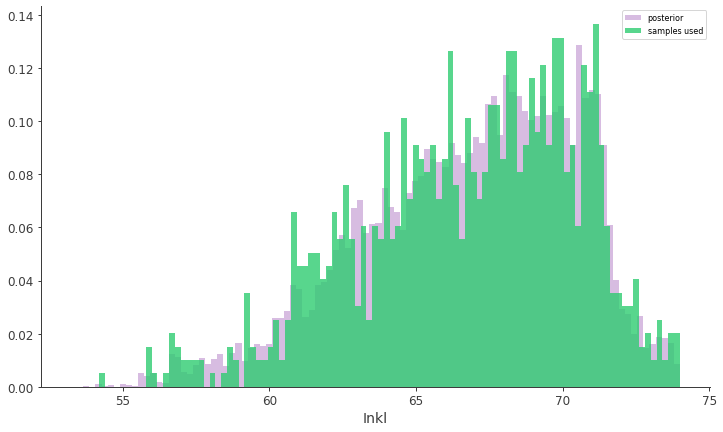

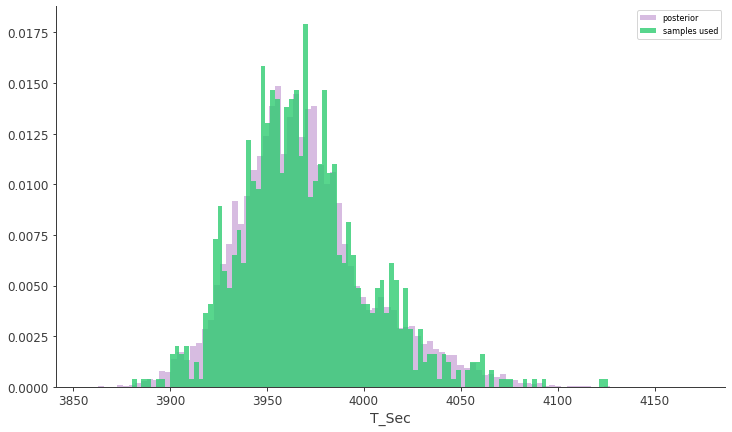

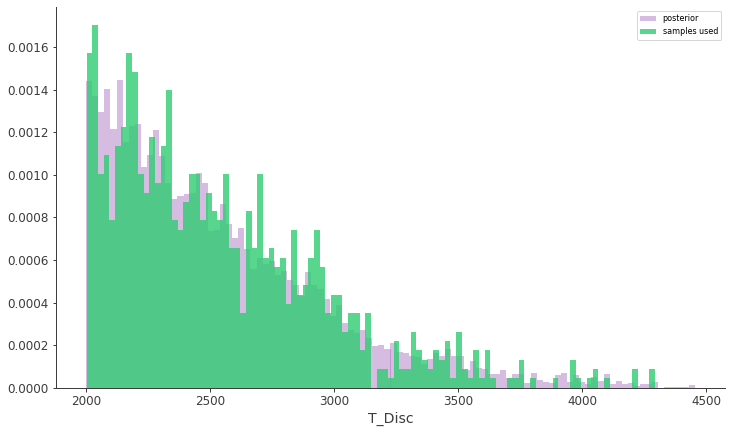

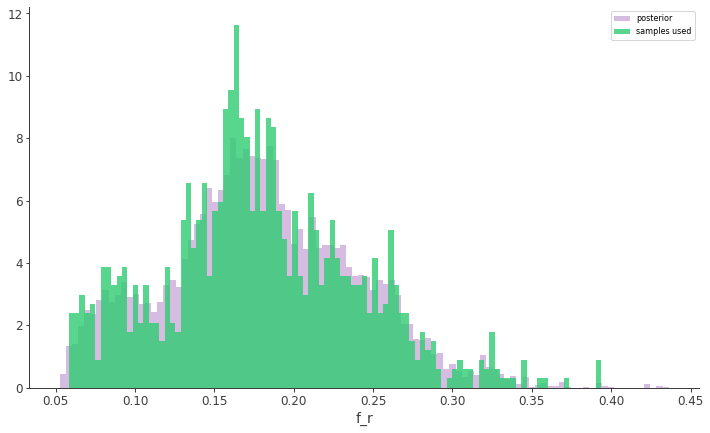

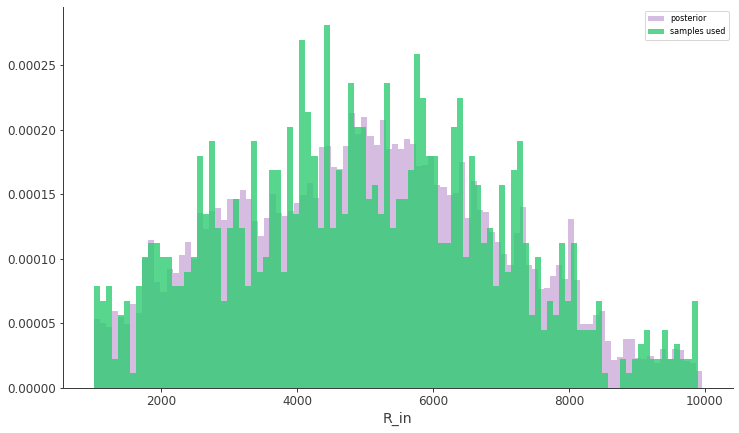

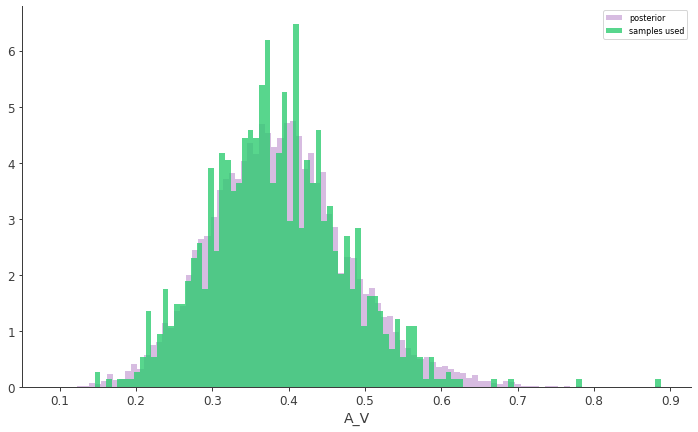

In [44]:
for j, name in enumerate(my_model.free_parameters.keys()):
    plt.figure()
    plt.hist(samples[j], alpha=0.4, bins=100, density=True, label='posterior')
    plt.hist(samples[j, index_array], alpha=0.8, bins=100, density=True, label='samples used')
    plt.xlabel(name.split('.')[-1])
    plt.legend()